In [18]:
import tensorflow as tf


In [20]:
import pandas as pd

In [21]:
from sklearn.model_selection import train_test_split


In [22]:
%matplotlib inline

In [23]:

import matplotlib.pyplot as plt

In [24]:
def read_data():
  """
  read the CSV data 
  """
  data = pd.read_csv("https://goo.gl/PQXxZ8")
  size_data = data["Size"].values
  price_data = data["Price"].values
  return size_data, price_data

In [25]:
def split_test_train(size, price):
  # split the data, test size = 33%
  size_train, size_test, price_train, price_test = train_test_split(size, price, test_size=0.33)
  return size_train, size_test, price_train, price_test

In [26]:
def normalize(array): 
    return (array - array.mean()) / array.std()


In [32]:
X_train, X_test, Y_train,Y_test = split_test_train(size, price)
size, price = read_data()

In [33]:
# normalize the data
X_train = normalize(X_train)
Y_train = normalize(Y_train)

X_test = normalize(X_test)
Y_test = normalize(Y_test)

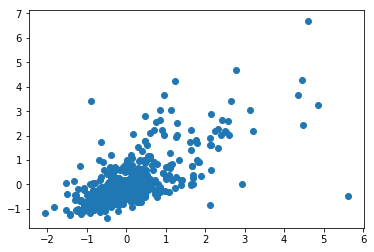

In [34]:
plt.scatter(X_train, Y_train, label='Samples data')

In [35]:

plt.draw()

In [51]:
def get_model_tensors():
  """
  function obtain model tensor
  """
  # X is the placeholder for size of the house from the dataset.
  # Y is the placeholder for size of the house from the dataset.
  X = tf.placeholder("float")
  Y = tf.placeholder("float")
  
  # The parameters theta0 and theta1 
  theta1 = tf.Variable(np.random.randn(), name="weight")
  theta0 = tf.Variable(np.random.randn(), name="bias")
  
  # Hypothesis = theta0 + theta1 * X
  x_theta1 = tf.multiply(X, theta1)
  model = tf.add(x_theta1 , theta0)
  
  return X, Y, theta1, theta0, model


In [52]:
def get_cost_optimizer_tensor(Y, model, size, learning_rate):
  """
  Tensor for calculating the cost function and the the optimizer for 
  minimizing the cost.
  """
  # Cost function tensor.
  cost_function = tf.reduce_sum(tf.pow(model - Y, 2))/(2 * size) 
  # gradient descent tensor.
  gradient_descent = tf.train.GradientDescentOptimizer(learning_rate) 
  # optimization tensor.
  optimizer = gradient_descent.minimize(cost_function)
    
  return optimizer, cost_function
  


In [57]:
init = tf.initialize_all_variables()
# Set parameters
learning_rate = 0.1
training_iteration = 200
X, Y, theta1, theta0, model = get_model_tensors()

optimizer, cost_function = get_cost_optimizer_tensor(Y, model,len(X_train), learning_rate )

In [64]:
with tf.Session() as sess:
    sess.run(init)
    display_step = 20
    for iteration in range(training_iteration):
        sess.run(optimizer,  feed_dict={X: X_train, Y: Y_train})
    


FailedPreconditionError: Attempting to use uninitialized value bias
	 [[Node: bias/read = Identity[T=DT_FLOAT, _class=["loc:@GradientDescent/update_bias/ApplyGradientDescent"], _device="/job:localhost/replica:0/task:0/device:CPU:0"](bias)]]

Caused by op 'bias/read', defined at:
  File "/usr/lib/python3.6/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/usr/lib/python3.6/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/usr/lib/python3/dist-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/usr/lib/python3/dist-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/usr/lib/python3/dist-packages/ipykernel/kernelapp.py", line 486, in start
    self.io_loop.start()
  File "/usr/lib/python3/dist-packages/tornado/ioloop.py", line 888, in start
    handler_func(fd_obj, events)
  File "/usr/lib/python3/dist-packages/tornado/stack_context.py", line 277, in null_wrapper
    return fn(*args, **kwargs)
  File "/usr/local/lib/python3.6/dist-packages/zmq/eventloop/zmqstream.py", line 450, in _handle_events
    self._handle_recv()
  File "/usr/local/lib/python3.6/dist-packages/zmq/eventloop/zmqstream.py", line 480, in _handle_recv
    self._run_callback(callback, msg)
  File "/usr/local/lib/python3.6/dist-packages/zmq/eventloop/zmqstream.py", line 432, in _run_callback
    callback(*args, **kwargs)
  File "/usr/lib/python3/dist-packages/tornado/stack_context.py", line 277, in null_wrapper
    return fn(*args, **kwargs)
  File "/usr/lib/python3/dist-packages/ipykernel/kernelbase.py", line 283, in dispatcher
    return self.dispatch_shell(stream, msg)
  File "/usr/lib/python3/dist-packages/ipykernel/kernelbase.py", line 233, in dispatch_shell
    handler(stream, idents, msg)
  File "/usr/lib/python3/dist-packages/ipykernel/kernelbase.py", line 399, in execute_request
    user_expressions, allow_stdin)
  File "/usr/lib/python3/dist-packages/ipykernel/ipkernel.py", line 208, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "/usr/lib/python3/dist-packages/ipykernel/zmqshell.py", line 537, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "/usr/lib/python3/dist-packages/IPython/core/interactiveshell.py", line 2718, in run_cell
    interactivity=interactivity, compiler=compiler, result=result)
  File "/usr/lib/python3/dist-packages/IPython/core/interactiveshell.py", line 2822, in run_ast_nodes
    if self.run_code(code, result):
  File "/usr/lib/python3/dist-packages/IPython/core/interactiveshell.py", line 2882, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-57-51d9c861dda8>", line 5, in <module>
    X, Y, theta1, theta0, model = get_model_tensors()
  File "<ipython-input-51-461cbd3d4256>", line 12, in get_model_tensors
    theta0 = tf.Variable(np.random.randn(), name="bias")
  File "/usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/variables.py", line 259, in __init__
    constraint=constraint)
  File "/usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/variables.py", line 422, in _init_from_args
    self._snapshot = array_ops.identity(self._variable, name="read")
  File "/usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/array_ops.py", line 79, in identity
    return gen_array_ops.identity(input, name=name)
  File "/usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/gen_array_ops.py", line 3263, in identity
    "Identity", input=input, name=name)
  File "/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/op_def_library.py", line 787, in _apply_op_helper
    op_def=op_def)
  File "/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/ops.py", line 3414, in create_op
    op_def=op_def)
  File "/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/ops.py", line 1740, in __init__
    self._traceback = self._graph._extract_stack()  # pylint: disable=protected-access

FailedPreconditionError (see above for traceback): Attempting to use uninitialized value bias
	 [[Node: bias/read = Identity[T=DT_FLOAT, _class=["loc:@GradientDescent/update_bias/ApplyGradientDescent"], _device="/job:localhost/replica:0/task:0/device:CPU:0"](bias)]]


In [61]:
sess